In [18]:
import pandas as pd
from scipy.stats import linregress
# import plt
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generalized_linear_regression(X, Y, dY):
    """
    Generalized (weighted) linear regression with intercept.

    Model:
        Y = beta0 + beta1 * X + eps
        Cov(eps) = sigma^2 * D, where D = diag(dY^2)
    """

    X = np.asarray(X)
    Y = np.asarray(Y)
    dY = np.asarray(dY)
    n = len(Y)

    # Design matrix with intercept
    A = np.vstack([np.ones_like(X), X]).T  # n x 2

    # Weight matrix D^{-1}
    W = np.diag(1.0 / dY**2)

    # Fit parameters
    cov_beta = np.linalg.inv(A.T @ W @ A)
    beta_hat = cov_beta @ (A.T @ W @ Y)
    beta0, beta1 = beta_hat

    # residuals
    residuals = Y - A @ beta_hat

    # sigma^2_hat
    p = 2
    sigma2_hat = (residuals.T @ W @ residuals) / (n - p)

    # standard errors
    sde = np.sqrt(np.diag(cov_beta) * sigma2_hat)
    sde_beta0, sde_beta1 = sde

    # Weighted R^2
    Y_mean = np.average(Y, weights=1/dY**2)
    ss_tot = np.sum(((Y - Y_mean)**2) / dY**2)
    ss_res = np.sum((residuals**2) / dY**2)
    R2 = 1 - ss_res / ss_tot

    # Reduced chi^2
    chi2_red = ss_res / (n - p)

    # --- Plot ---
    fig, ax = plt.subplots()
    ax.errorbar(X, Y, yerr=dY, fmt='o', label='data')
    xfit = np.linspace(np.min(X), np.max(X), 200)
    yfit = beta0 + beta1 * xfit
    ax.plot(xfit, yfit, 'r-', label='fit')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_title('Weighted Linear Fit')
    fig.tight_layout()

    # Prediction function with uncertainty
    def predict(x_new):
        x_new = np.asarray(x_new)
        A_new = np.vstack([np.ones_like(x_new), x_new]).T
        y_pred = A_new @ beta_hat
        pred_var = sigma2_hat * np.sum(A_new @ cov_beta * A_new, axis=1)
        pred_err = np.sqrt(pred_var)
        return y_pred, pred_err

    # return results + fig handle
    return {
        "beta0": beta0,
        "beta1": beta1,
        "sde_beta0": sde_beta0,
        "sde_beta1": sde_beta1,
        "sigma2_hat": sigma2_hat,
        "R2": R2,
        "chi2_red": chi2_red,
        "predict": predict,
        "fig": fig,
        "ax":ax
    }


In [20]:
df = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.0780_0015.0782_0015.0783_0015.0784_0015.0785_.csv")
x = df['Bx_nr']
y = df['omega_NE']
dy = df['uncertainty_omega_NE']

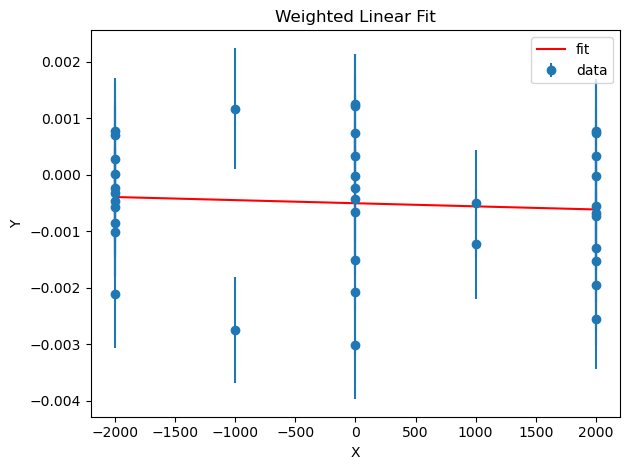

In [21]:
res = generalized_linear_regression(x,y,dy)

In [22]:
res

{'beta0': -0.000504275451124069,
 'beta1': -5.516668242118164e-08,
 'sde_beta0': 0.0001886886689468336,
 'sde_beta1': 1.1790454202649208e-07,
 'sigma2_hat': 1.424766711191373,
 'R2': 0.006216079847387257,
 'chi2_red': 1.424766711191373,
 'predict': <function __main__.generalized_linear_regression.<locals>.predict(x_new)>,
 'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <Axes: title={'center': 'Weighted Linear Fit'}, xlabel='X', ylabel='Y'>}

$$
\frac{\partial \omega ^{NE}}{\partial B_{x}^{nr}}=-0.055\pm 0.118  \mu rad/s/\mu G
\\
d\omega ^{NE}\left( from\,\,B_{x}^{nr} \right) =\sqrt{\left( \delta \left( \frac{\partial \omega ^{NE}}{\partial B_{x}^{nr}} \right) \cdot B_{x}^{nr} \right) ^2+\left( \delta B_{x}^{nr}\cdot \left( \frac{\partial \omega ^{NE}}{\partial B_{x}^{nr}} \right) \right) ^2}
\\
=\sqrt{\left( 0.118\times 48.4 \right) ^2+\left( 0.055\times 0.2 \right) ^2}
\\
=5.7\mu rad/s
$$


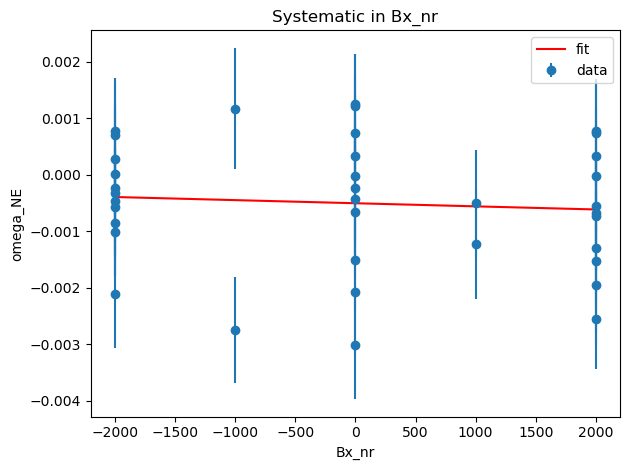

In [30]:
res["ax"].set_title("Systematic in Bx_nr")
res["ax"].set_ylabel("omega_NE")
res["ax"].set_xlabel("Bx_nr")
res["fig"]